# **Forest Cover Type Prediction**

#### **Introduction**

This notebook documents a project focused on predicting forest cover types using the [Kaggle dataset: Forest Cover Type Prediction Dataset](https://www.kaggle.com/competitions/forest-cover-type-prediction/data)
. The project is part of the **Big Data** module of ENIT's 3rd year MIndS and is undertaken by **Group 4**: Chaima Balti, Roukaya Lakhzouri, and Salsabil Rouahi. We are working under the supervision of our professor, **Moez Ben Haj Hmida**.

The primary goal of this project is to explore and apply various machine learning techniques to accurately classify forest cover types based on specific features related to soil, climate, and topography. 

#### **Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### **Data exploration**

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


The columns from our dataset used for predicting forest cover type based on cartographic attributes are:

##### **Features Columns**
1. **Id**: A unique identifier for each record.
2. **Elevation**: Elevation in meters.
3. **Aspect**: Aspect (compass direction that a slope faces) in degrees (0 to 360).
4. **Slope**: Slope of the surface in degrees.
5. **Horizontal_Distance_To_Hydrology**: Horizontal distance to the nearest surface water (stream or river) in meters.
6. **Vertical_Distance_To_Hydrology**: Vertical distance to the nearest surface water in meters.
7. **Horizontal_Distance_To_Roadways**: Horizontal distance to the nearest roadway in meters.
8. **Hillshade_9am**: Hillshade index (0 to 255) at 9 AM, indicating the degree of illumination.
9. **Hillshade_Noon**: Hillshade index (0 to 255) at noon.
10. **Hillshade_3pm**: Hillshade index (0 to 255) at 3 PM.
11. **Horizontal_Distance_To_Fire_Points**: Horizontal distance to nearest wildfire ignition points in meters.

12. **Wilderness_Area1**: Indicator for the presence of a particular wilderness area.
13. **Wilderness_Area2**: Indicator for the presence of a second type of wilderness area.
14. **Wilderness_Area3**: Indicator for the presence of a third type of wilderness area.
15. **Wilderness_Area4**: Indicator for the presence of a fourth type of wilderness area.

16. **Soil_Type1** to **Soil_Type40**: Each column indicates the presence (`1`) or absence (`0`) of a particular soil type.

##### **Target Column**
57. **Cover_Type**: The target variable. It represents the type of forest cover, categorized into seven classes (1 to 7), each corresponding to a different forest cover type.


In [5]:
# Check for missing values
print(df.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


=> No missing values in the data

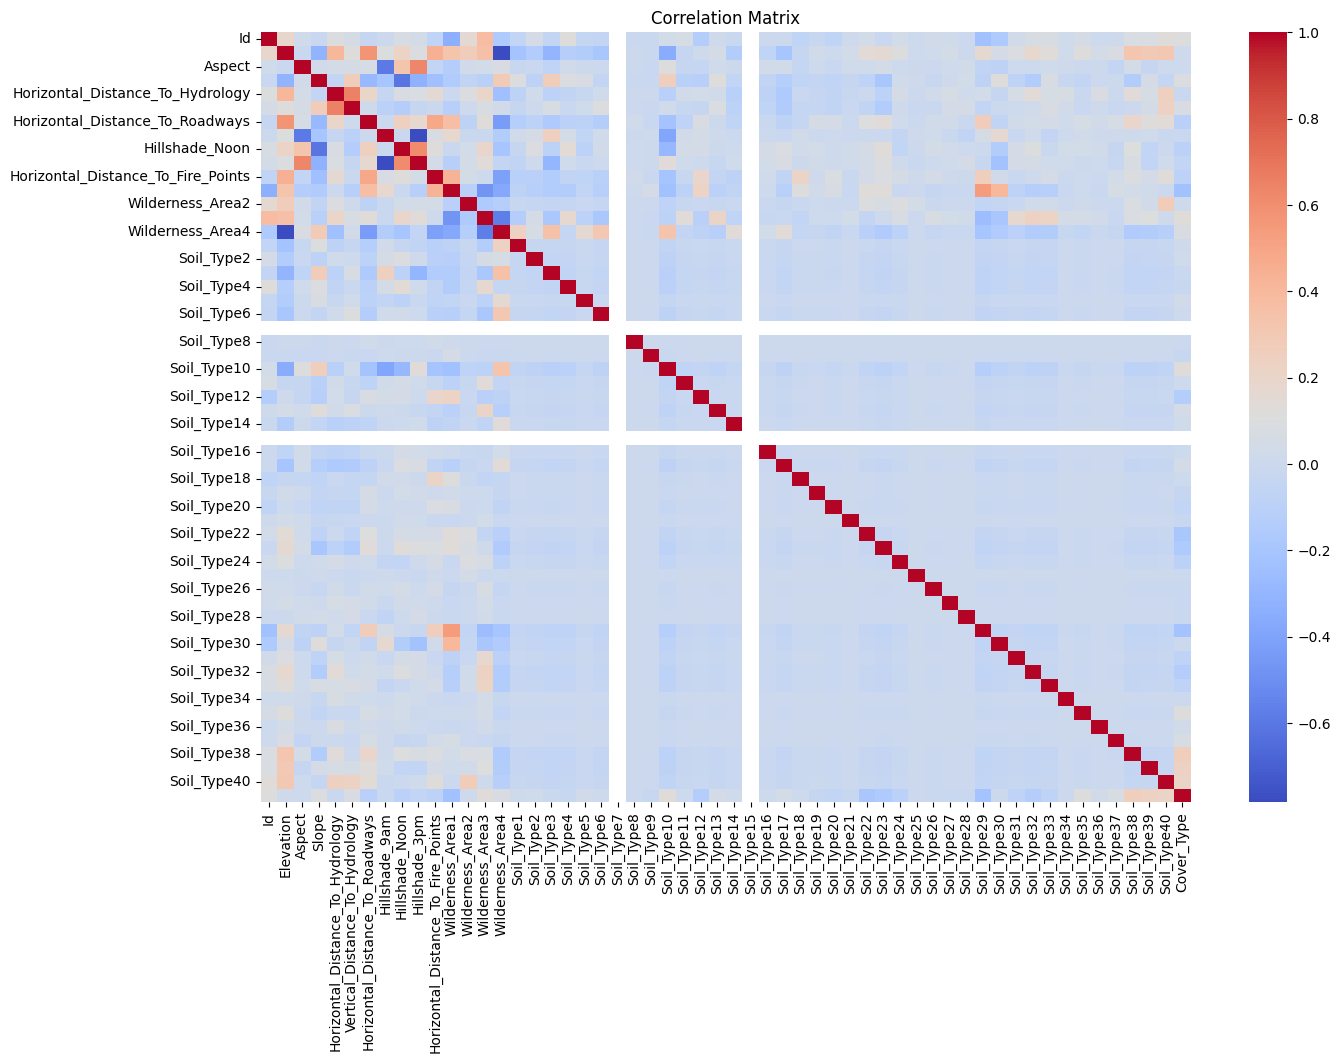

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Check correlations with the target column
correlation_with_target = correlation_matrix['Cover_Type'].abs()

# Identify features with low correlation with the target
low_correlation_features = correlation_with_target[correlation_with_target < 0.2].index

# Print features to drop
print("Features to drop:", len(low_correlation_features))


Features to drop: 48


In [8]:
dropped_feat = list(low_correlation_features)
dropped_feat.extend(["Soil_Type15", "Soil_Type7"])
dropped_feat

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type15',
 'Soil_Type7']

In [9]:
clean_df = df.drop(columns=dropped_feat)

In [10]:
# Compute correlation matrix
correlation_matrix = clean_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Wilderness_Area1,Soil_Type29,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Wilderness_Area1,1.000000,0.546309,0.033239,0.022629,-0.007419,-0.230117
Soil_Type29,0.546309,1.000000,-0.068718,-0.065121,-0.054062,-0.218564
Soil_Type38,0.033239,-0.068718,1.000000,-0.047936,-0.039795,0.257810
Soil_Type39,0.022629,-0.065121,-0.047936,1.000000,-0.037712,0.240384
Soil_Type40,-0.007419,-0.054062,-0.039795,-0.037712,1.000000,0.205851
Cover_Type,-0.230117,-0.218564,0.257810,0.240384,0.205851,1.000000


<Figure size 1500x1000 with 0 Axes>

=> We cannot eliminate any features (except the id), as all of them exhibit insufficient correlation with the target variable.

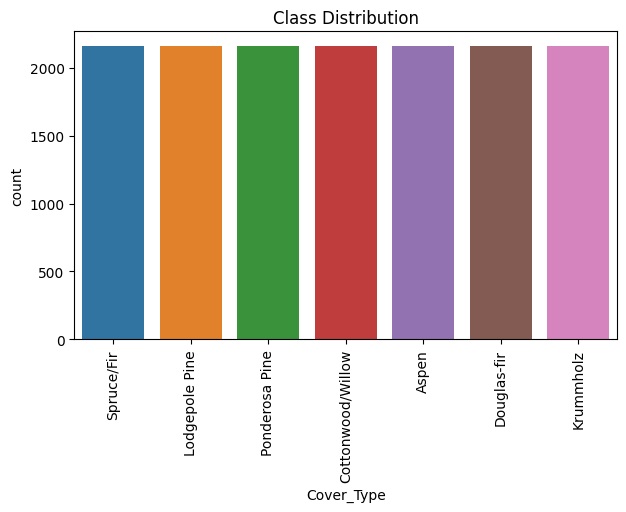

In [11]:
# Count the number of instances for each class
CLASSES = [
        'Spruce/Fir', 
        'Lodgepole Pine', 
        'Ponderosa Pine', 
        'Cottonwood/Willow', 
        'Aspen', 
        'Douglas-fir', 
        'Krummholz'
]
plt.figure(figsize=(7,4))
sns.countplot(df, x='Cover_Type')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels =CLASSES, rotation=90)
plt.title('Class Distribution')
plt.show()

### Model ( SVM FOR Multiclass classification )

In [12]:
# 1. Separate features (X) and target (y)
X = df.drop(columns=['Cover_Type'])  # Drop the target column
y = df['Cover_Type']  # Target variable

In [13]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 3. Standardize the data (SVM performs better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 4. Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [16]:
# 5. Make predictions and evaluate the model
y_pred = svm_classifier.predict(X_test_scaled)

In [17]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [18]:
# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7229

Confusion Matrix:
[[298  69   0   0  19   0  35]
 [ 98 230  15   0  79  11   5]
 [  0   1 242  67   7 111   0]
 [  0   0  29 405   0  15   0]
 [  3  43  18   0 344   8   0]
 [  0   5  87  50  15 275   0]
 [ 46   0   2   0   0   0 392]]

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.71      0.69       421
           2       0.66      0.53      0.59       438
           3       0.62      0.57      0.59       428
           4       0.78      0.90      0.83       449
           5       0.74      0.83      0.78       416
           6       0.65      0.64      0.65       432
           7       0.91      0.89      0.90       440

    accuracy                           0.72      3024
   macro avg       0.72      0.72      0.72      3024
weighted avg       0.72      0.72      0.72      3024



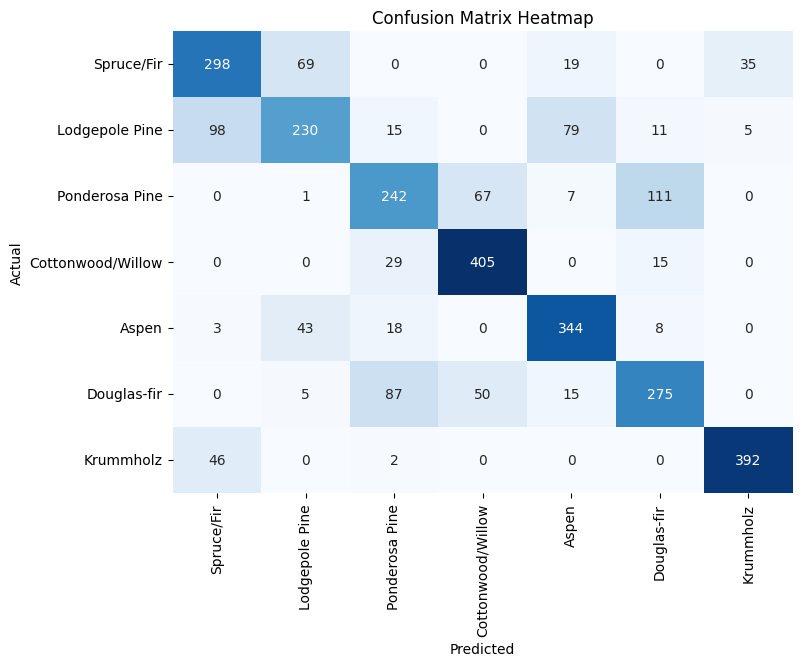

In [19]:
# Assuming y_test and y_pred are your actual and predicted values

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=CLASSES, yticklabels=CLASSES)

# Add labels and title
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

### Decision Tree / Random forest / Gradient Boosting

In [20]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()


In [21]:
#training the model and predicting the test data
model1=dt.fit(X_train_scaled, y_train)
y_pred1=model1.predict(X_test_scaled)

In [22]:
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8062

Confusion Matrix:
[[291  91   0   0  10   0  29]
 [107 267  12   0  35  14   3]
 [  0   6 328  16   4  74   0]
 [  0   0  15 426   0   8   0]
 [  6  25   7   0 376   2   0]
 [  0  10  55  14   5 348   0]
 [ 35   3   0   0   0   0 402]]

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.69      0.68       421
           2       0.66      0.61      0.64       438
           3       0.79      0.77      0.78       428
           4       0.93      0.95      0.94       449
           5       0.87      0.90      0.89       416
           6       0.78      0.81      0.79       432
           7       0.93      0.91      0.92       440

    accuracy                           0.81      3024
   macro avg       0.80      0.81      0.80      3024
weighted avg       0.81      0.81      0.81      3024



In [23]:
#training the model and predicting the test data
model2=rf.fit(X_train_scaled, y_train)
y_pred2=model2.predict(X_test_scaled)

In [24]:
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8823

Confusion Matrix:
[[337  53   0   0  12   0  19]
 [ 75 314  15   0  28   5   1]
 [  0   1 360  19   2  46   0]
 [  0   0   4 441   0   4   0]
 [  1   8  10   0 395   2   0]
 [  0   3  21  14   2 392   0]
 [ 10   1   0   0   0   0 429]]

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       421
           2       0.83      0.72      0.77       438
           3       0.88      0.84      0.86       428
           4       0.93      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.91      0.89       432
           7       0.96      0.97      0.97       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [25]:
#training the model and predicting the test data
model3=gb.fit(X_train_scaled, y_train)
y_pred3=model3.predict(X_test_scaled)

In [26]:
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8191

Confusion Matrix:
[[307  61   0   0  20   0  33]
 [ 94 265  11   0  53  11   4]
 [  0   0 326  23   7  72   0]
 [  0   0   8 436   0   5   0]
 [  1  15  15   0 379   6   0]
 [  0   5  59  17   9 342   0]
 [ 18   0   0   0   0   0 422]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73       421
           2       0.77      0.61      0.68       438
           3       0.78      0.76      0.77       428
           4       0.92      0.97      0.94       449
           5       0.81      0.91      0.86       416
           6       0.78      0.79      0.79       432
           7       0.92      0.96      0.94       440

    accuracy                           0.82      3024
   macro avg       0.81      0.82      0.81      3024
weighted avg       0.82      0.82      0.82      3024



### HeatMap of Random Forest 


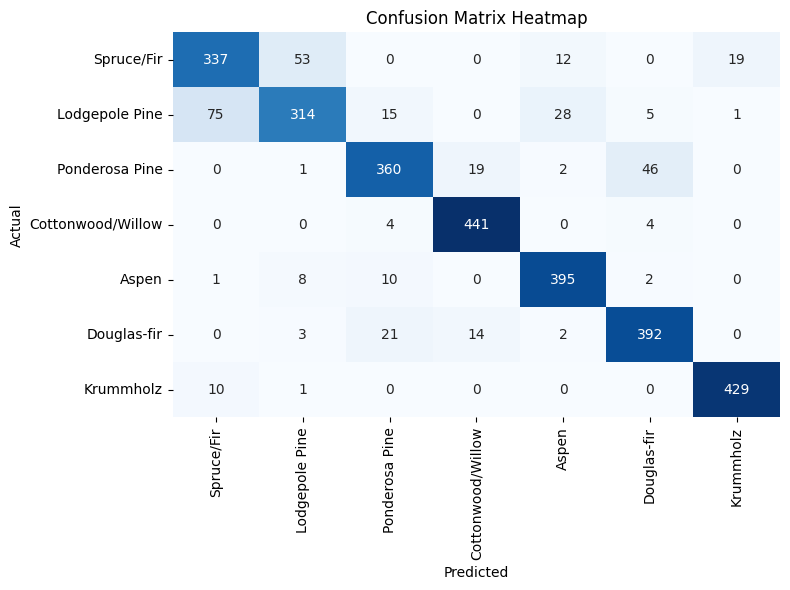

In [27]:
# Compute the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=CLASSES, yticklabels=CLASSES)

# Add labels and title
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

In [36]:
import os
import joblib

# Folder where you want to save the model
folder_path = 'models_folder'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model inside the folder
model_filename = os.path.join(folder_path, 'Random_Forest.joblib')
joblib.dump(model, model_filename)

print(f"Model saved successfully in {model_filename}.")


Model saved successfully in models_folder\Random_Forest.joblib.
